What is Sentiment Analysis:
also known as opinion mining or emotion AI, is the use of NLP tasks to extract subjective information by analyzing text data provided by users.

In this case I will be dealing with customer reviews of a specific product from Amazon ecommerce website.
This sentiment analysis of the product reviews is an important way that can open ways to understand the performance of the products, and get the customers reaction.

In [86]:
# Import required libraries:
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk.corpus import wordnet, stopwords
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/student/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!

In [87]:
df = pd.read_csv("Fire_TV_Stick_4K_version2.csv", header=0)

df.head()

,ReviewerName,ReviewTitle,Reviews,Rating
0,Merrill,"Arrived broken, after 3 hours talking to Amazo...",DO NOT BUY FIRE TV DEVICES!!! CHOOSE ANOTHER S...,4
1,Mark R. Wietstock,Unreliable. Multiple connection drops every day,We purchased a 4K Ultra HD Fire Stick as a rep...,5
2,alternative Travel Press,Annoying if you don’t want/have kids+,I bought this to limit the time my kids spend ...,3
3,Kindle Customer,Not compatible with Toshiba Fire TV on the sam...,I bought a fire stick 4k and a 4k max to repla...,1
4,Amazon Customer,COMPLET LOSS OF RESPECT FOR AMAZON!!!!!!!!!,I ordered three fire sticks and two of them ar...,1


In [88]:
# Double check for Null Values:
df.isnull().sum()

ReviewerName    0
ReviewTitle     1
Reviews         8
Rating          0
dtype: int64

Data Cleaning:
It can be seen that there are some null values present in the dataset. 1 in the column of ReviewerName, 2 in the ReviewTitle, 10 in the Reviews, and none in the class label, Rating. Since there are no null values in the target I can work with that. Because, it is possible that a user might leave a rating with a review title with no review message or vice-versa. So I will have to move on.

In [89]:
# Checking the columns there is.
df.columns

Index(['ReviewerName', 'ReviewTitle', 'Reviews', 'Rating'], dtype='object')

In [90]:
print('length of data is', len(df))

length of data is 2470


In [91]:
df.shape

(2470, 4)

In [92]:
df.dtypes

ReviewerName    object
ReviewTitle     object
Reviews         object
Rating           int64
dtype: object

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ReviewerName  2470 non-null   object
 1   ReviewTitle   2469 non-null   object
 2   Reviews       2462 non-null   object
 3   Rating        2470 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 77.3+ KB


In [94]:
# Check for unique target values we have in the dataset.
df['Rating'].unique()

array([4, 5, 3, 1, 2])

It can be observed that from the collected data of the selected product, there was no rating below 2. That could be a sign that almost everyone that bought it did not find anything wrong to the extent of giving it a rating less than 2, or the people that found the product to be rated less than 2 did not bother expressing their disatisfaction.

Note: the Above issue was fixed by re-running web scrapping process to try and balance the dataset to use. I filtered reviews based on their ratings and collected that in batch.

<AxesSubplot:xlabel='Rating', ylabel='count'>

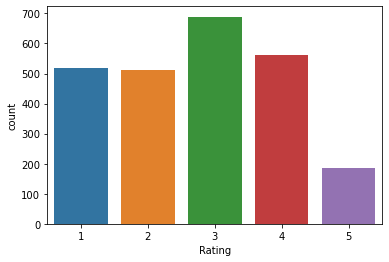

In [95]:
# Plotting the target values for data visualization.
sns.countplot(x='Rating', data=df)

In [96]:
# Dataset version 1 to compare with the second version
df1 = pd.read_csv("Fire_TV_Stick_4K.csv", header=0)

df1.head()

,ReviewerName,ReviewTitle,Reviews,Rating
0,Merrill,High initial failure rate... but works well,Recently cut the cable and converted TVs to fi...,4
1,Mark R. Wietstock,Works great,Works great. Not hard to set up. I was able to...,5
2,Paul M,must have internet service!,Purchased & connected easily to a 6 yr old Sam...,3
3,susan l. sedia,Makes watching tv so much easier.,If you don't have a smart tv then I would high...,4
4,milo,Love the fire stick wish it had lasted longer ...,Love the fire stick. Although this one Only l...,5


<AxesSubplot:xlabel='Rating', ylabel='count'>

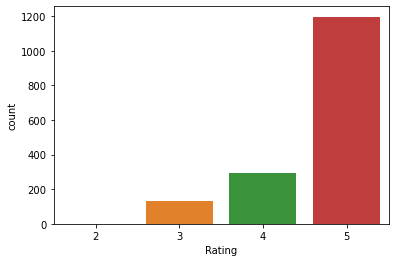

In [97]:
# Plotting the target values for data visualization for version 1.
sns.countplot(x='Rating', data=df1)

It is apparent that the data collected for the second time is better since it is more balanced compared to the first one. 

Data Pre-Processing

Text pre

In [98]:
df

,ReviewerName,ReviewTitle,Reviews,Rating
0,Merrill,"Arrived broken, after 3 hours talking to Amazo...",DO NOT BUY FIRE TV DEVICES!!! CHOOSE ANOTHER S...,4
1,Mark R. Wietstock,Unreliable. Multiple connection drops every day,We purchased a 4K Ultra HD Fire Stick as a rep...,5
2,alternative Travel Press,Annoying if you don’t want/have kids+,I bought this to limit the time my kids spend ...,3
3,Kindle Customer,Not compatible with Toshiba Fire TV on the sam...,I bought a fire stick 4k and a 4k max to repla...,1
4,Amazon Customer,COMPLET LOSS OF RESPECT FOR AMAZON!!!!!!!!!,I ordered three fire sticks and two of them ar...,1
...,...,...,...,...
2465,Meg,Love,Love,4
2466,Evelyn,Perfect,Thanks,4
2467,Edward E. Grzeda,Easy use,It tracks well and keeps your place across all...,5
2468,Gary,I love this item. Thank you!!,I love this it cuts out my DIRECTV and fortuna...,3


Get stopwords.
It refers to a set of commonly used words in English. these words are considered to not add any significant information to a phrase but used for gramatically use. removing them would allowed me to reduce the size of input tokens.


In [99]:
stopwords_list = stopwords.words('english')

Preprocessing:
during the pre-processing stage, transformation to the dataset was done. The transformation aimed at removing non alpha-numeric characters from the reviews. Those characters are removed to improve the training set for a better classification process.
Another important process performed is converting the reviews in lower case to improve the classification model, by doing so it increases its chances to effectively identify similar terms.
Before filtering out the stop words from the reviews dataset, the reviews are split into a list.

In [100]:
def preProcessing(df):
  # drop any rows w/ missing values
  df = df.dropna()
  # remove non alphanumeric 
  df['review_cleaned'] = df.Reviews.str.replace('[^a-zA-Z0-9 ]', '')
  # lowercase
  df.review_cleaned = df.review_cleaned.str.lower()
  # split into list
  df.review_cleaned = df.review_cleaned.str.split(' ')
  # print(df.review_cleaned)
  # remove stopwords
  df.review_cleaned = df.review_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])
  # df.review_cleaned = df.review_cleaned.apply(lambda x: print(x))
  return df

In [101]:
preProcessing(df)

,ReviewerName,ReviewTitle,Reviews,Rating,review_cleaned
0,Merrill,"Arrived broken, after 3 hours talking to Amazo...",DO NOT BUY FIRE TV DEVICES!!! CHOOSE ANOTHER S...,4,"[buy, fire, tv, devices, choose, another, stre..."
1,Mark R. Wietstock,Unreliable. Multiple connection drops every day,We purchased a 4K Ultra HD Fire Stick as a rep...,5,"[purchased, 4k, ultra, hd, fire, stick, replac..."
2,alternative Travel Press,Annoying if you don’t want/have kids+,I bought this to limit the time my kids spend ...,3,"[bought, limit, time, kids, spend, tv, bought,..."
3,Kindle Customer,Not compatible with Toshiba Fire TV on the sam...,I bought a fire stick 4k and a 4k max to repla...,1,"[bought, fire, stick, 4k, 4k, max, replace, 2,..."
4,Amazon Customer,COMPLET LOSS OF RESPECT FOR AMAZON!!!!!!!!!,I ordered three fire sticks and two of them ar...,1,"[ordered, three, fire, sticks, two, fine, thir..."
...,...,...,...,...,...
2465,Meg,Love,Love,4,[love]
2466,Evelyn,Perfect,Thanks,4,[thanks]
2467,Edward E. Grzeda,Easy use,It tracks well and keeps your place across all...,5,"[tracks, well, keeps, place, across, devices, ..."
2468,Gary,I love this item. Thank you!!,I love this it cuts out my DIRECTV and fortuna...,3,"[love, cuts, directv, fortunately, internet, f..."


Another dataset transformation performed was Lemmatization, which is a process that aims to reduce words to their root. Even though both Stemming and Lemmatization can be used to achieve the same end goal, in this case Lemmatization was chosen over Stemming. Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. Lemmatization, on the other hand, takes into consideration the morphological analysis of the words[2]. Lemmatization acheives that with the help of detailed dictionaries that are used by the algorithm to link the inflectional forms to their lemma.

However, it was observed that Lemmatization takes relatively longer compared to Stemming due to the morphological analysis overhead.

In [102]:
def getWordnetPos(term):
  tag = nltk.pos_tag([term])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = nltk.stem.WordNetLemmatizer()

def getLemma(sent):
  return " ".join([lemmatizer.lemmatize(w, getWordnetPos(w)) for w in nltk.word_tokenize(sent)])

In [103]:
clean_data = preProcessing(df)
clean_data

,ReviewerName,ReviewTitle,Reviews,Rating,review_cleaned
0,Merrill,"Arrived broken, after 3 hours talking to Amazo...",DO NOT BUY FIRE TV DEVICES!!! CHOOSE ANOTHER S...,4,"[buy, fire, tv, devices, choose, another, stre..."
1,Mark R. Wietstock,Unreliable. Multiple connection drops every day,We purchased a 4K Ultra HD Fire Stick as a rep...,5,"[purchased, 4k, ultra, hd, fire, stick, replac..."
2,alternative Travel Press,Annoying if you don’t want/have kids+,I bought this to limit the time my kids spend ...,3,"[bought, limit, time, kids, spend, tv, bought,..."
3,Kindle Customer,Not compatible with Toshiba Fire TV on the sam...,I bought a fire stick 4k and a 4k max to repla...,1,"[bought, fire, stick, 4k, 4k, max, replace, 2,..."
4,Amazon Customer,COMPLET LOSS OF RESPECT FOR AMAZON!!!!!!!!!,I ordered three fire sticks and two of them ar...,1,"[ordered, three, fire, sticks, two, fine, thir..."
...,...,...,...,...,...
2465,Meg,Love,Love,4,[love]
2466,Evelyn,Perfect,Thanks,4,[thanks]
2467,Edward E. Grzeda,Easy use,It tracks well and keeps your place across all...,5,"[tracks, well, keeps, place, across, devices, ..."
2468,Gary,I love this item. Thank you!!,I love this it cuts out my DIRECTV and fortuna...,3,"[love, cuts, directv, fortunately, internet, f..."


In [104]:
clean_data.review_cleaned = clean_data.review_cleaned.apply(' '.join)
clean_data

,ReviewerName,ReviewTitle,Reviews,Rating,review_cleaned
0,Merrill,"Arrived broken, after 3 hours talking to Amazo...",DO NOT BUY FIRE TV DEVICES!!! CHOOSE ANOTHER S...,4,buy fire tv devices choose another streaming p...
1,Mark R. Wietstock,Unreliable. Multiple connection drops every day,We purchased a 4K Ultra HD Fire Stick as a rep...,5,purchased 4k ultra hd fire stick replacement f...
2,alternative Travel Press,Annoying if you don’t want/have kids+,I bought this to limit the time my kids spend ...,3,bought limit time kids spend tv bought fire ta...
3,Kindle Customer,Not compatible with Toshiba Fire TV on the sam...,I bought a fire stick 4k and a 4k max to repla...,1,bought fire stick 4k 4k max replace 2 chromeca...
4,Amazon Customer,COMPLET LOSS OF RESPECT FOR AMAZON!!!!!!!!!,I ordered three fire sticks and two of them ar...,1,ordered three fire sticks two fine third funct...
...,...,...,...,...,...
2465,Meg,Love,Love,4,love
2466,Evelyn,Perfect,Thanks,4,thanks
2467,Edward E. Grzeda,Easy use,It tracks well and keeps your place across all...,5,tracks well keeps place across devices house t...
2468,Gary,I love this item. Thank you!!,I love this it cuts out my DIRECTV and fortuna...,3,love cuts directv fortunately internet fast ch...


In [105]:
clean_data['review_cleaned_lemmatized'] = clean_data.review_cleaned.apply(getLemma)
clean_data

,ReviewerName,ReviewTitle,Reviews,Rating,review_cleaned,review_cleaned_lemmatized
0,Merrill,"Arrived broken, after 3 hours talking to Amazo...",DO NOT BUY FIRE TV DEVICES!!! CHOOSE ANOTHER S...,4,buy fire tv devices choose another streaming p...,buy fire tv device choose another stream playe...
1,Mark R. Wietstock,Unreliable. Multiple connection drops every day,We purchased a 4K Ultra HD Fire Stick as a rep...,5,purchased 4k ultra hd fire stick replacement f...,purchase 4k ultra hd fire stick replacement fi...
2,alternative Travel Press,Annoying if you don’t want/have kids+,I bought this to limit the time my kids spend ...,3,bought limit time kids spend tv bought fire ta...,bought limit time kid spend tv bought fire tab...
3,Kindle Customer,Not compatible with Toshiba Fire TV on the sam...,I bought a fire stick 4k and a 4k max to repla...,1,bought fire stick 4k 4k max replace 2 chromeca...,bought fire stick 4k 4k max replace 2 chromeca...
4,Amazon Customer,COMPLET LOSS OF RESPECT FOR AMAZON!!!!!!!!!,I ordered three fire sticks and two of them ar...,1,ordered three fire sticks two fine third funct...,order three fire stick two fine third function...
...,...,...,...,...,...,...
2465,Meg,Love,Love,4,love,love
2466,Evelyn,Perfect,Thanks,4,thanks,thanks
2467,Edward E. Grzeda,Easy use,It tracks well and keeps your place across all...,5,tracks well keeps place across devices house t...,track well keep place across device house tv t...
2468,Gary,I love this item. Thank you!!,I love this it cuts out my DIRECTV and fortuna...,3,love cuts directv fortunately internet fast ch...,love cut directv fortunately internet fast che...


Word Vectorization

Also known as Word embeddings, it refers to a process of representing texts with numerical values in a predefined vector. This is a crucial process in natural language processing tasks, since row tests can be used as input to machine learning algorithms. This allows similar texts to have a similar representation in a vector space.

Count vectorization could help us determine the value of a word in the corpus by considering its frequency in the documents. Every document, in this case every review, can be represented by a vector whose size equals the vocabulary size. But, incase of a large corpus the created matrix from that vectorization would be too sparse due to the infrequent use of some vocabularies in some documents/reviews in addition to the fact the importance of a word wouldn't be accurately represented by that mere vectorizatio. Thus, This notion of importance of a word in a document is captured by a scheme, known as the term frequency-inverse document frequency (tf-idf ) weighting scheme[4].

TF-IDF Vectorization:
Term frequency-inverse document frequency ( TF-IDF), measures how importance of a word to a document in a collection of documents, by multiplying the word's frequency in a dcoument and the inverse document frequency of the word across a set of documents. The TF-IDF scheme is very important in text mining especially in natural language processing to generate the composite weight of words.

For this project Tf-Idf was used to assign a score/weight that represents the importance of each word in the review corpora. A words with higher value of tf-idf score/weight indicated that those words are more informative in the classification of reviews. To achieve that, a pipeline was created with the help of Pipeline class from the scikit-learn library. The first step in the pipeline was to use CountVectorizer to transform the reviews into a matrix of token counts to obtain term frequency (Tf). For my CountVectorizer the range of n-grams was set to consider both unigrams (=single word) and bigrams (=combination of two words).

Next, the TfidfTransformer function was implemented to convert the count matrix into normalized TF-IDF representation.




In [106]:
nb = Pipeline([('vectorize', CountVectorizer(ngram_range=(1, 2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

ML Classifiers for Multi-Classification

1. Multinomial Naive Bayes Classifier
is one of the basic but powerful algorithms used for classification. Multinomial Naive Bayes Classifier is based on the Bayes Theorem which assumes that all features are independent of each other. In this project, it would be assuming that every word in a review is independent of the other ones.

2. Linear Support Vector Machine
is a linear classifier which is optimized by Stochastic Gradient Descent. SGD algorithm computes the minimum of the cost function through iteratively updating the gradient with a randomly selected single sample.

3. Logistic Regression Classifier
is a common supervised machine learning algorithm for categorizing data into binary or multiple groups with discrete prediction values. It is a regression model based on the sigmoid function for computing the probability of each data points belonging to the categories. It follows the assumption that there exists a linear relationship between the logit of independent variables and the response.

[Work on rephrasing the above paragraphs]

In [107]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=500)),
               ])

Before throwing the dataset to our models for training, data split was performed. It was important to use the ‘stratify’ parameter, which makes a split with equal proportions of each class (=sentiment labels)

In [109]:

x = clean_data['review_cleaned_lemmatized']
y = clean_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 44)

Evaluation Metrics

For evaluating our candidate model for the prediction of sentiment multi-classification, we will be using accuracy on the test data set. Accuracy is a metric simply dividing # of correct predictions by the total # of predictions. We concluded that accuracy would be the most appropriate and concise measure as we previously re-sampled our initial data to become well balanced among all 5 sentiment classes. Just a quick note, in case of dealing with imbalanced data, the f1-score metric (a mixture of recall & precision) is recommended.

All the trained models were eveluated based on their predications of sentiment multi-classification. Used metrics are ...

Accuracy:
[Its definition from project 1]

In [110]:
Model_scores = pd.DataFrame(columns=['Algorithm','Model Score'])

In [111]:
# Naive Bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('Naive Bayes\n')
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print(confusion_matrix(y_test, y_pred_nb))
model = {}

model['Algorithm'] = 'MultinomialNB'
model['Model Score'] = str(round((accuracy_score(y_test, y_pred_nb)*100),2)) + "%"
Model_scores = Model_scores.append(model, ignore_index=True)


Naive Bayes

0.385395537525355
              precision    recall  f1-score   support

           1       0.47      0.62      0.53       104
           2       0.67      0.04      0.07       102
           3       0.33      0.72      0.45       138
           4       0.49      0.19      0.27       112
           5       0.00      0.00      0.00        37

    accuracy                           0.39       493
   macro avg       0.39      0.32      0.27       493
weighted avg       0.44      0.39      0.32       493

[[ 65   2  36   1   0]
 [ 29   4  67   2   0]
 [ 25   0 100  13   0]
 [ 12   0  79  21   0]
 [  8   0  23   6   0]]


In [112]:
# SGD Classifier
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print('SGD Classifier\n')
print(accuracy_score(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

print(confusion_matrix(y_test, y_pred_sgd))
model = {}
model['Algorithm'] = 'LinearSVM'
model['Model Score'] = str(round((accuracy_score(y_test, y_pred_sgd)*100),2)) + "%"
Model_scores = Model_scores.append(model, ignore_index=True)

SGD Classifier

0.359026369168357
              precision    recall  f1-score   support

           1       0.45      0.58      0.50       104
           2       0.18      0.15      0.16       102
           3       0.34      0.37      0.35       138
           4       0.42      0.45      0.43       112
           5       0.20      0.03      0.05        37

    accuracy                           0.36       493
   macro avg       0.32      0.31      0.30       493
weighted avg       0.34      0.36      0.34       493

[[60 21 13  9  1]
 [30 15 41 16  0]
 [26 29 51 30  2]
 [13 13 35 50  1]
 [ 5  6 10 15  1]]


In [113]:
# Logistic Regression
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print('Logistic Regression\n')
print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print(confusion_matrix(y_test, y_pred_log))
model = {}
model['Algorithm'] = 'Logistic Regression'
model['Model Score'] = str(round((accuracy_score(y_test, y_pred_log)*100),2)) + "%"
Model_scores = Model_scores.append(model, ignore_index=True)

Logistic Regression

0.385395537525355
              precision    recall  f1-score   support

           1       0.44      0.65      0.53       104
           2       0.26      0.11      0.15       102
           3       0.33      0.46      0.38       138
           4       0.45      0.43      0.44       112
           5       0.00      0.00      0.00        37

    accuracy                           0.39       493
   macro avg       0.30      0.33      0.30       493
weighted avg       0.34      0.39      0.35       493

[[68 10 21  5  0]
 [36 11 46  9  0]
 [29 15 63 31  0]
 [11  3 50 48  0]
 [ 9  3 12 13  0]]


In [119]:

from sklearn.model_selection import GridSearchCV

grid=[{'clf__solver': ['lbfgs', 'sag', 'saga'],
       'clf__C': [0.01, 0.1, 1]}]
lr = GridSearchCV(logreg, param_grid = grid, cv = 5, scoring='accuracy', verbose = 1, n_jobs = -1)
best_model = lr.fit(X_train, y_train)

print(best_model.best_estimator_)
print(best_model.best_score_)

y_pred_grid = best_model.predict(X_test)
print(classification_report(y_test, y_pred_grid))
print(accuracy_score(y_test, y_pred_grid))

print(confusion_matrix(y_test, y_pred_grid))
final_conf_matrix = confusion_matrix(y_test, y_pred_grid)
model = {}
model['Algorithm'] = 'Logistic Regression Post Tunning'
model['Model Score'] = str(round((accuracy_score(y_test, y_pred_grid)*100),2)) + "%"
Model_scores = Model_scores.append(model, ignore_index=True)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=1, max_iter=500))])
0.3973469730434894
              precision    recall  f1-score   support

           1       0.44      0.65      0.53       104
           2       0.26      0.11      0.15       102
           3       0.33      0.46      0.38       138
           4       0.45      0.43      0.44       112
           5       0.00      0.00      0.00        37

    accuracy                           0.39       493
   macro avg       0.30      0.33      0.30       493
weighted avg       0.34      0.39      0.35       493

0.385395537525355
[[68 10 21  5  0]
 [36 11 46  9  0]
 [29 15 63 31  0]
 [11  3 50 48  0]
 [ 9  3 12 13  0]]


In [115]:
# All Scores Compared
Model_scores

,Algorithm,Model Score
0,MultinomialNB,38.54%
1,LinearSVM,35.9%
2,Logistic Regression,38.54%
3,Logistic Regression Post Tunning,38.54%


Close look to the Confusion Matrix:

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories=[1, 2, 3, 4, 5],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

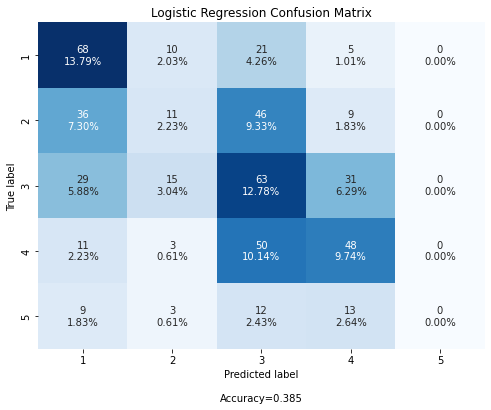

In [123]:
make_confusion_matrix(final_conf_matrix, figsize=(8,6), cbar=False, title='Logistic Regression Confusion Matrix')